## Task 6: Prediction using Decision Tree  Algorithm 

### Business Case: Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("IRIS (DT).csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# First five rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Last five rows
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Shape of data(Rows,Columns)
data.shape

(150, 6)

In [6]:
# Statistical data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Name of columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
# Checking the missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Unique values
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
count=data['Species'].value_counts()
count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Domain Analysis

* Id: Index number

* SepalLengthCm: Length of sepal in centimetres.

* SepalWidthCm: Width of sepal in centimetres.

* PetalLengthCm: Length of petal in centimetres.

* PetalWidthCm: Width of the petal in centimetres.

* Species: Species of the Iris flower.

### Exploratory Data Analysis

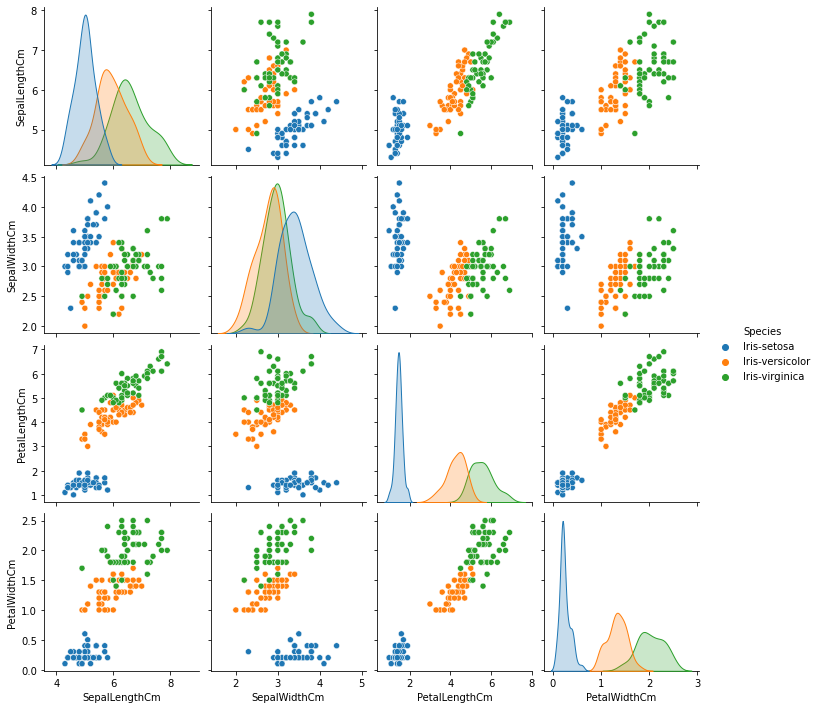

In [19]:
sns.pairplot(data.drop(['Id'],axis=1), hue='Species')
plt.show()

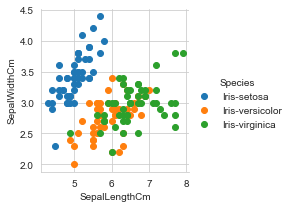

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

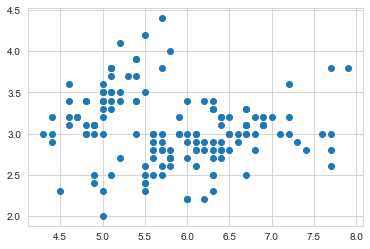

In [22]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.show()

In [24]:
data['Sepal_petal_length_diff'] = data['SepalLengthCm']-data['PetalLengthCm']
data['Sepal_petal_width_diff'] = data['SepalWidthCm']-data['PetalWidthCm']
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_length_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3,3.7
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8,3.5
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0,3.4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4,3.6


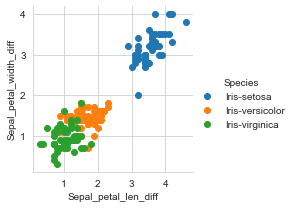

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

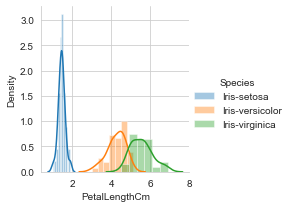

In [31]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(sns.distplot,'PetalLengthCm')\
   .add_legend()
plt.show()

In [27]:
data['Sepal_diff'] = data['SepalLengthCm']-data['SepalWidthCm']
data['petal_diff'] = data['PetalLengthCm']-data['PetalWidthCm']
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_length_diff,Sepal_diff,petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3,3.7,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8,3.5,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0,3.4,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9,3.1,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4,3.6,1.4,1.2


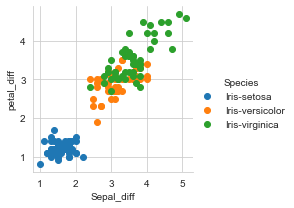

In [28]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()

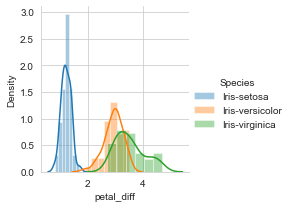

In [29]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()

In [32]:
data['Sepal_petal_length_width_diff'] = data['SepalLengthCm']-data['PetalWidthCm']
data['Sepal_petal_width_length_diff'] = data['SepalWidthCm']-data['PetalLengthCm']
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_length_diff,Sepal_diff,petal_diff,Sepal_petal_length_width_diff,Sepal_petal_width_length_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3,3.7,1.6,1.2,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8,3.5,1.9,1.2,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0,3.4,1.5,1.1,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9,3.1,1.5,1.3,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4,3.6,1.4,1.2,4.8,2.2


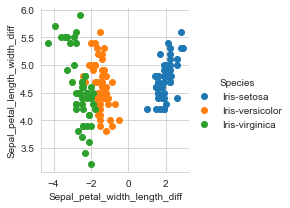

In [34]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(plt.scatter,'Sepal_petal_width_length_diff','Sepal_petal_length_width_diff')\
   .add_legend()
plt.show()

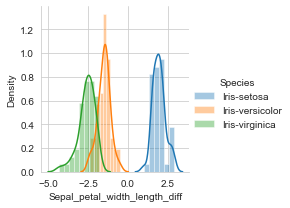

In [35]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species')\
   .map(sns.distplot,'Sepal_petal_width_length_diff')\
   .add_legend()
plt.show()

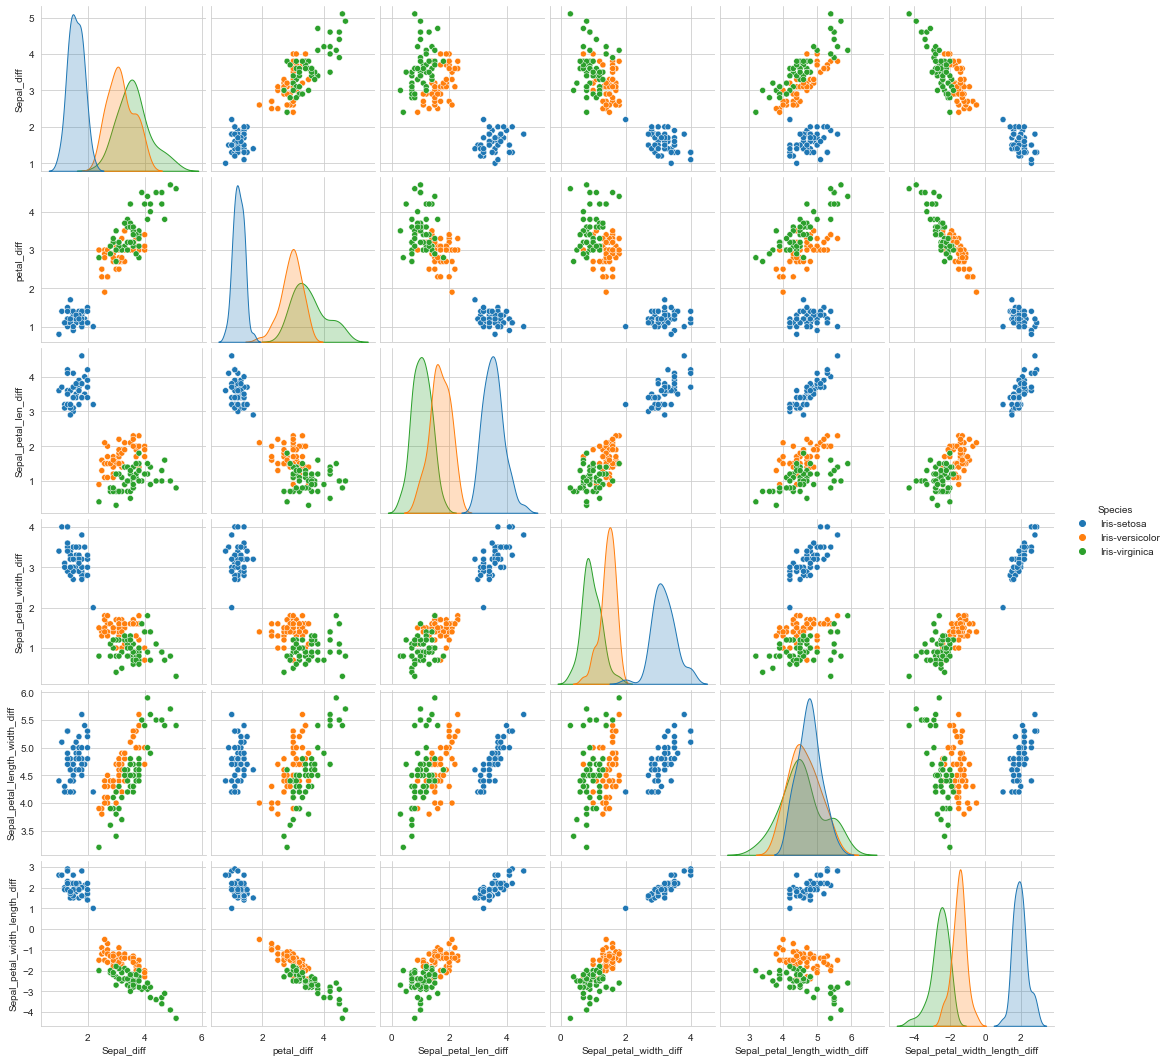

In [37]:
sns.pairplot(data[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_length_width_diff',\
       'Sepal_petal_width_length_diff']], hue='Species')
plt.show()

### Feature engineering

<AxesSubplot:>

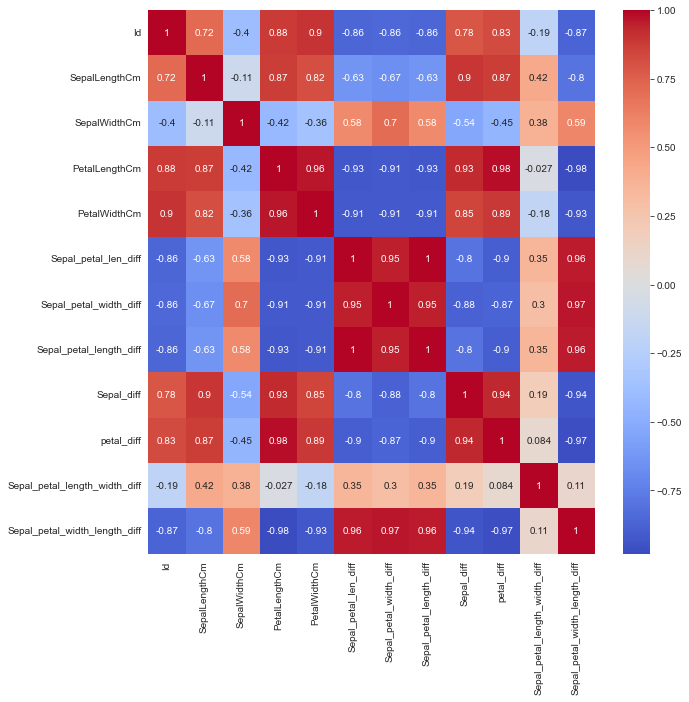

In [39]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

### Model building

In [41]:
## Importing necessary libraries
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,  accuracy_score

In [44]:
x=data.iloc[:, 1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
y = data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [46]:
std =  StandardScaler()
x = std.fit_transform(x)

In [48]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size = 0.3, random_state=1)

In [69]:
x_train

array([[ 2.24968346e+00, -1.05056946e+00,  1.78634131e+00,
         1.44795564e+00],
       [-1.73673948e-01,  1.72626612e+00, -1.17067529e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.26418478e+00, -1.24957601e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-7.79513300e-01, -8.19166497e-01,  8.03701950e-02,
         2.64698913e-01],
       [-9.00681170e-01,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-4.16009689e-01,  1.03205722e+00, -1.39813811e+00,
        -1.31297673e+00],
       [ 2.24968346e+00,  1.72626612e+00,  1.67260991e+00,
         1.31648267e+00],
       [ 1.28034050e+00,  1.06445364e-01,  9.33355755e-01,
         1.18500970e+00],
       [ 1.76501198e+00, -3.56360566e-01,  1.44514709e+00,
         7.90590793e-01],
       [ 6.74501145e-01, -5.87763531e-01,  1.04708716e+00,
         1.31648267e+00],
       [ 4.32165405e-01, -5.87763531e-01,  5.92161531e-01,
      

In [70]:
y_train

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
            ...       
133     Iris-virginica
137     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
Name: Species, Length: 105, dtype: object

In [71]:
x_test

array([[-5.25060772e-02,  2.18907205e+00, -1.45500381e+00,
        -1.31297673e+00],
       [-9.00681170e-01, -1.28197243e+00, -4.31421141e-01,
        -1.29719997e-01],
       [ 9.16836886e-01, -1.24957601e-01,  3.64698715e-01,
         2.64698913e-01],
       [-5.37177559e-01,  1.95766909e+00, -1.39813811e+00,
        -1.05003079e+00],
       [ 2.49201920e+00,  1.72626612e+00,  1.50201279e+00,
         1.05353673e+00],
       [ 5.53333275e-01,  5.69251294e-01,  5.35295827e-01,
         5.27644853e-01],
       [ 1.28034050e+00,  1.06445364e-01,  7.62758643e-01,
         1.44795564e+00],
       [-9.00681170e-01,  1.72626612e+00, -1.05694388e+00,
        -1.05003079e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.22754100e+00,
        -1.31297673e+00],
       [ 1.28034050e+00,  3.37848329e-01,  1.10395287e+00,
         1.44795564e+00],
       [-2.94841818e-01, -8.19166497e-01,  2.50967307e-01,
         1.33225943e-01],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
      

In [72]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
56     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
29         Iris-setosa
120     Iris-virginica
94     Iris-versicolor
5          Iris-setosa
102     Iris-virginica
51     Iris-versicolor
78     Iris-versicolor
42         Iris-setosa
92     Iris-versicolor
66     Iris-versicolor
31         Iris-setosa
35         Iris-setosa
90     Iris-versicolor
84     Iris-versicolor
77     Iris-versicolor
40         Iris-setosa
125     Iris-virginica
99     Iris-versicolor
33         Iris-setosa
19         Iris-setosa
73     Iris-versicolor
146     Iris-virginica
91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
48         Iris-setosa
53     Iris-versicolor
28         Iris-setosa
54     Iris-versicolor
108     Iris-virginica
112     Iris-virginica
17         Iris-setosa
119     Iris-virginica
103     Iri

### Model creation: 

In [49]:
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = DT.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### Model accuracy: 

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

95.55555555555556


In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test, clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [56]:
cm= metrics.confusion_matrix(y_test, clf.predict(x_test))
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [57]:
fn= ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn= ['setosa','versicolor','virginica']

### Visualization of Model

In [59]:
from sklearn.tree import plot_tree

In [65]:
colm = data.columns.tolist()
colm

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species',
 'Sepal_petal_len_diff',
 'Sepal_petal_width_diff',
 'Sepal_petal_length_diff',
 'Sepal_diff',
 'petal_diff',
 'Sepal_petal_length_width_diff',
 'Sepal_petal_width_length_diff']

In [66]:
list = data['Species'].unique().tolist()
print(list)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


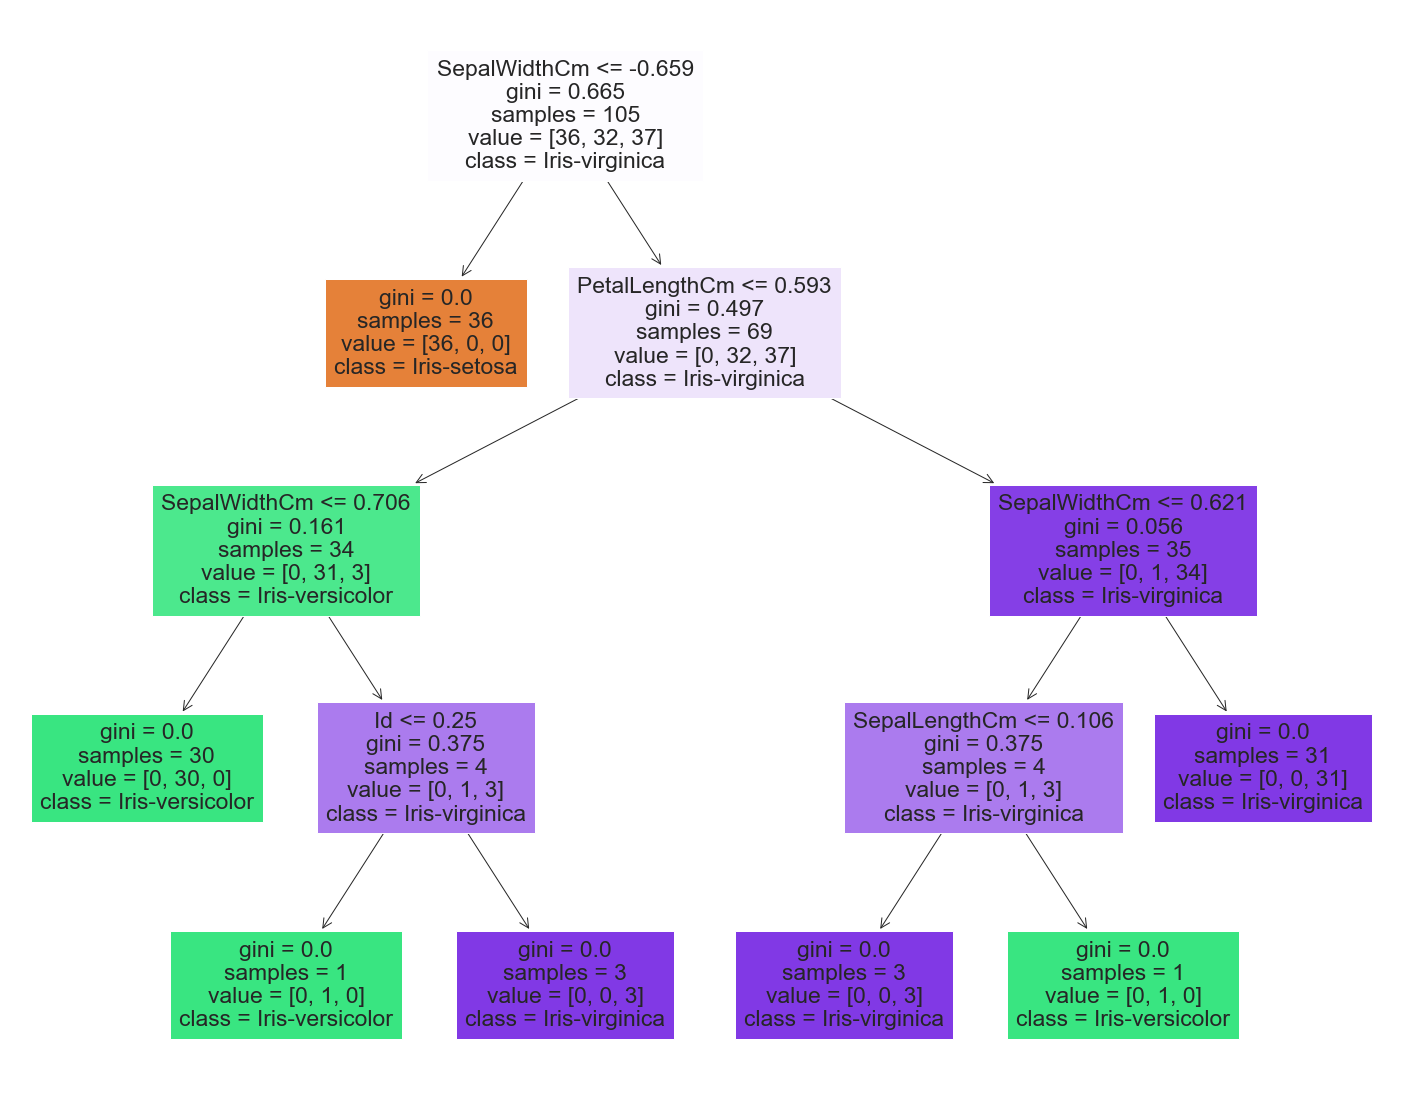

In [68]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(DT, feature_names = colm, class_names = list, filled = True)

## Conclusion:

* Accuracy score of Decision Tree Classifier is 95.55%.
* This concludes that Decision Tree Classifier is working comparitively good on this dataset.